In [1]:
# Feature Engineering - Log Polar Histograms
import cv2

print('OpenCV version: {}'.format(cv2.__version__))

OpenCV version: 3.4.4


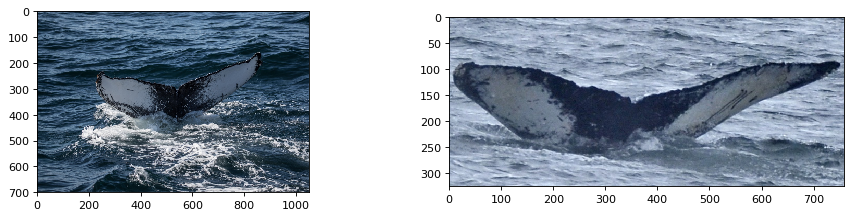

In [3]:
import numpy as np

# Read in two different whales
im1 = cv2.cvtColor(
    cv2.imread(r'/home/share/dataset/kaggle_whale/train/0000e88ab.jpg', cv2.IMREAD_UNCHANGED),
    cv2.COLOR_BGR2RGB
)
im1_notch = np.array([543, 308])
im2 = cv2.cvtColor(
    cv2.imread(r'/home/share/dataset/kaggle_whale/train/0001f9222.jpg', cv2.IMREAD_UNCHANGED),
    cv2.COLOR_BGR2RGB
)
im2_notch = np.array([355, 167])

# Plot them
import matplotlib.pyplot as plt

f = plt.figure(
    num=1, 
    figsize=(14, int(14*1/float(4))), 
    dpi=80, 
    facecolor='w', 
    edgecolor='k'
)
plt.subplot(1,2,1)
f.gca().grid(False)
plt.imshow(im1)
plt.subplot(1,2,2)
f.gca().grid(False)
plt.imshow(im2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/simeon/PycharmProjects/start-learning/venv/lib/python3.6/site-packages/matplotlib/cm.py:273: RuntimeWarning: invalid value encountered in multiply
  xx = (xx * 255).astype(np.uint8)


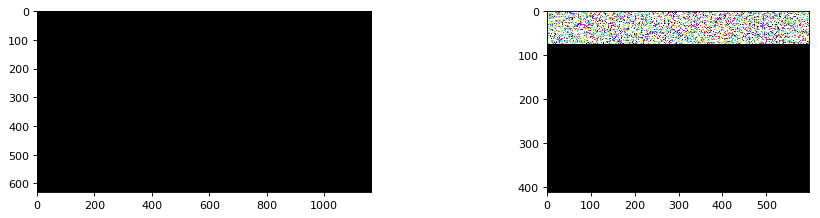

In [4]:
from scipy import interpolate

def cart2pol(cart_coord, center):
    rho = np.sqrt(np.sum(np.power(cart_coord, 2.0)))
    phi = np.arctan2(cart_coord[1]/cart_coord[0])
    return rho, phi

def pol2cart(pol_coord, center):
    x = pol_coord[:,0] * np.cos(pol_coord[:,1]) + center[0]
    y = pol_coord[:,0] * np.sin(pol_coord[:,1]) + center[1]
    return np.vstack((x, y)).T

# Convert images to polar images at centerpoint
def cart_to_polar_image(cart_image, center):
    try:
        channels = cart_image.shape[2]
    except:
        channels = 1
    # Inverse transform polar mesh grid into cartesian coordinates
    image_R = np.sqrt((cart_image.shape[0]/2)**2 + (cart_image.shape[1]/2)**2)
    # Step radius by 1px in the longest dimension
    image_r = np.arange(image_R)
    # Try not to change the total number of pixels in the image
    image_n_theta = cart_image.shape[0]*cart_image.shape[1]/image_r.shape[0]
    image_d_theta = 2*np.pi/image_n_theta
    image_theta = np.arange(0, 2*np.pi, image_d_theta)
    pol_image_shape = (image_r.shape[0], image_theta.shape[0], channels)
    pol_image = np.empty(pol_image_shape)
    print
    image_r_mesh, image_theta_mesh = np.meshgrid(image_r, image_theta)
    image_r_theta = np.dstack((image_r_mesh, image_theta_mesh))
    image_r_theta_in_cart = np.reshape(
        pol2cart(np.reshape(image_r_theta, (image_r_theta.shape[0]*image_r_theta.shape[1], image_r_theta.shape[2])), center),
        image_r_theta.shape
    )
    # Bilinearly interpolate image into polar image
    for polar, cart in zip(
            np.reshape(image_r_theta, (np.multiply(*image_r_theta.shape[0:2]), image_r_theta.shape[2])), 
            np.reshape(image_r_theta_in_cart, (np.multiply(*image_r_theta_in_cart.shape[0:2]), image_r_theta_in_cart.shape[2]))
        ):
        # Figure out how to store the rotated image in polar coordinates (can't have fractional coordinates)
        # Bilinearly interpolate the cartesian image
        pass
    
    return pol_image

im1_polar = cart_to_polar_image(im1, im1_notch)
im2_polar = cart_to_polar_image(im2, im2_notch)

f = plt.figure(
    num=1, 
    figsize=(14, int(14*1/float(4))), 
    dpi=80, 
    facecolor='w', 
    edgecolor='k'
)
plt.subplot(1,2,1)
f.gca().grid(False)
plt.imshow(im1_polar)
plt.subplot(1,2,2)
f.gca().grid(False)
plt.imshow(im2_polar)
plt.show()